## Home Loan Eligibility

In [4]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('dark')

import statsmodels.api as stm

# import logistic regression model from sklearn pacakge
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [5]:
# Loading datasets

df = pd.read_csv('/Users/shashankbaluni/Documents/Introduction to Data Science/Final Project/loan-train.csv')

### Exploratory Data Analysis

In [6]:
# Displaying top 5 rows from our dataset

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# To understand the data I'll use describe() method to shows the important information from the dataset
# It provides the count, mean, standard deviation (std), min, quartiles and max.

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# info() function allows us to see many features of our dataset like #rows, number and names of columns, 
# their non-null values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# Frequency distribution of some important categorical variables

print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Education'].value_counts())
print(df['Loan_Status'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [10]:
# Replacing missing values with central tendency(ies) of the variables

df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Replacing missing values with its mean value for numeric variables

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['LoanAmount'].mean())

In [12]:
# Dropping rows with missing values for categorical (object) variables and Credit_History

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            511 non-null    object 
 1   Gender             511 non-null    object 
 2   Married            511 non-null    object 
 3   Dependents         511 non-null    object 
 4   Education          511 non-null    object 
 5   Self_Employed      511 non-null    object 
 6   ApplicantIncome    511 non-null    int64  
 7   CoapplicantIncome  511 non-null    float64
 8   LoanAmount         511 non-null    float64
 9   Loan_Amount_Term   511 non-null    float64
 10  Credit_History     511 non-null    float64
 11  Property_Area      511 non-null    object 
 12  Loan_Status        511 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 55.9+ KB


Instead of dropping rows with missing values for categorical variables, mode value might also be one of the options to replace it

In [13]:
# One-Hot Encoding to create dummies for some important variables with object datatype

df1 = pd.get_dummies(df, columns=['Gender','Married','Dependents','Education','Self_Employed',
                                              'Loan_Status','Property_Area'], 
                           prefix = ('Gender','Married','Dependents','Education','Self_Employed',
                                     'Loan_Status','Property_Area'), 
                           drop_first = True)
df1.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,1,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,1,0,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,1,0,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,1,0,1


/var/folders/z9/md38q7p97wl1z61cr1css6pw0000gn/T/ipykernel_68264/1467625634.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


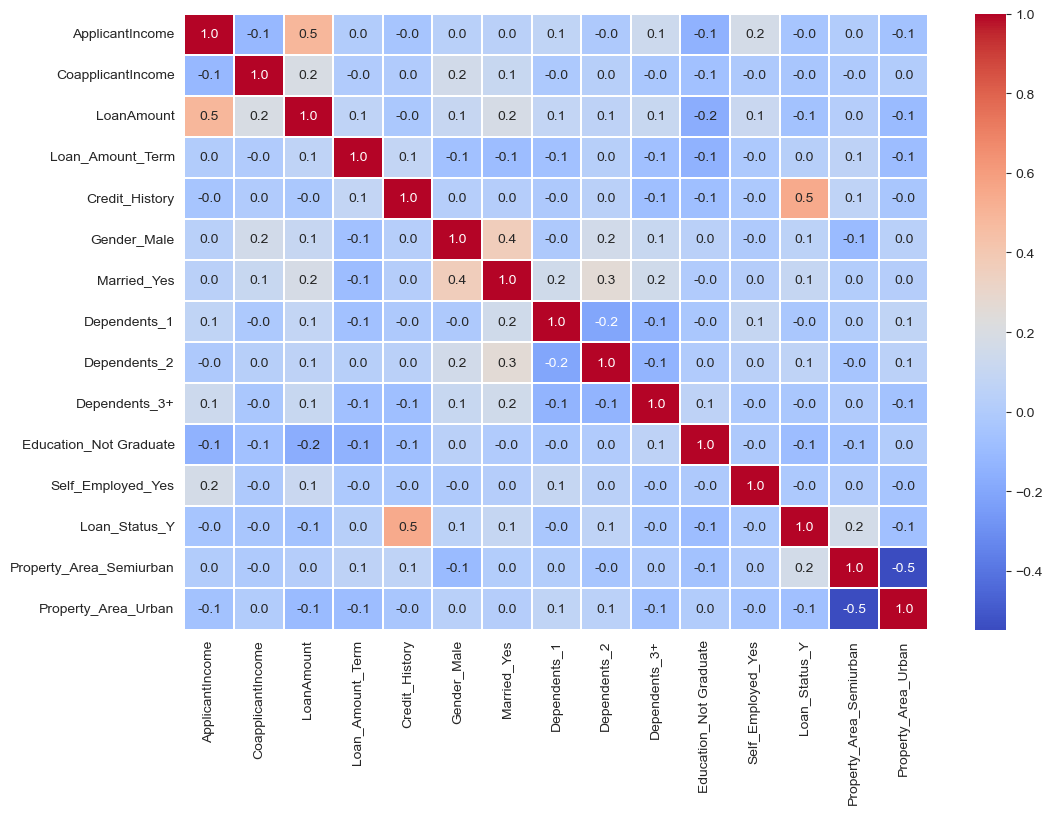

In [14]:
# correlation Matrix

plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

### Model Results and Evaluation

#### Model 1 - with Gender, Education, ApplicantIncome, Credit_History as input variables

By looking at the correlation matrix, I will run my model on Gender, Education, ApplicantIncome, Credit_History as input variables. LoanAmount has high correlation with ApplicantIncome and Married_Yes has high coorelation 
with both Gender_Male and Dependents_2, so I will not keep these variables.

In [16]:
# keep selected input variables only
train_features = ['Credit_History', 'Education_Not Graduate', 'ApplicantIncome', 'Gender_Male']

# Using train_test_split to split the dataset randomly using a train to test ratio of 80%/20%
trainX, testX, trainY, testY = train_test_split(df1[train_features].values, df1['Loan_Status_Y'].values, test_size=0.2, random_state=42)

# Statsmodel will return a table showing coefficient and p-value (the first "coef" column, and p>|z| column)
# I can further discuss about whether one independent variable is significant or not (p value smaller than threshold),
# and whether it is positivly or negative associated with the target variable.


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/shashankbaluni/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/shashankbaluni/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/shashankbaluni/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/shashankbaluni/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  408
Model:                          Logit   Df Residuals:                      403
Method:                           MLE   Df Model:                            4
Date:                Fri, 02 Feb 2024   Pseudo R-squ.:                     inf
Time:                        16:09:52   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7401      0.591     -4.633      0.000      -3.899      -1.581
x1             3.8999      0.536      7.282      0.000       2.850       4.950
x2            -0.4134      0.307     -1.346      0.178      -1.016       0.189
x3         -2.904e-05   2.72e-05     -1.069      0.285   -8.23e-05    2.42e-05
x4             0.4470      0.309      1.446      0.148      -0.159       1.053
==============================================================================
"""

Only Credit_History variable has its p-value less than threshold, hence, this variable is significant in explaining Loan_Status. Credit_History and Gender_Male variables are positively associated with the target variable, however, Education_Not Graduate and ApplicantIncome are negatively related.

In [172]:
# Initialize a logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(trainX, trainY)

# Use 5-fold Cross-Validation
scores = cross_val_score(logistic_model, trainX, trainY, cv = 5)

# Average of all accuracy scores - this will be used in model selection.
print(f"Train Model Accuracy: {scores.mean()}")

# check the coefficeints of the trained model
print('Coefficient of model :', logistic_model.coef_)

# check the intercept of the model
print('Intercept of model',logistic_model.intercept_)

# Make predictions on the test set
predictions = logistic_model.predict(testX)

# Evaluate the model
accuracy = accuracy_score(testY, predictions)
print(f"Test Model Accuracy: {accuracy}")

# Additional metrics and visualizations
print(classification_report(testY, predictions))
print("Confusion Matrix:")
print(confusion_matrix(testY, predictions))

Train Model Accuracy: 0.7989461005721168
Coefficient of model : [[ 3.22205945e+00 -2.24906954e-01 -2.87206310e-05  1.73349696e-01]]
Intercept of model [-1.91906436]
Test Model Accuracy: 0.8252427184466019
              precision    recall  f1-score   support

           0       0.85      0.53      0.65        32
           1       0.82      0.96      0.88        71

    accuracy                           0.83       103
   macro avg       0.83      0.74      0.77       103
weighted avg       0.83      0.83      0.81       103

Confusion Matrix:
[[17 15]
 [ 3 68]]


#### Model 2 - with Gender, Education, Credit_History as input variables

As the p-value of ApplicantIncome variable is greater than the threshold, I will run another model without this variable which can further improve model accuracy and results

In [173]:
# keep selected input variables only
train_features = ['Credit_History', 'Education_Not Graduate', 'Gender_Male']

# Using train_test_split to split the dataset randomly using a train to test ratio of 80%/20%
trainX, testX, trainY, testY = train_test_split(df1[train_features].values, df1['Loan_Status_Y'].values, test_size=0.2, random_state=42)

# Statsmodel will return a table showing coefficient and p-value (the first "coef" column, and p>|z| column)
# I can further discuss about whether one independent variable is significant or not (p value smaller than threshold),
# and whether it is positivly or negative associated with the target variable.

X_dat = stm.add_constant(trainX)
logit = stm.Logit(trainY, X_dat)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/shashankbaluni/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/shashankbaluni/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/shashankbaluni/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/shashankbaluni/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  408
Model:                          Logit   Df Residuals:                      404
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                     inf
Time:                        16:50:35   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8770      0.579     -4.972      0.000      -4.011      -1.743
x1             3.8749      0.535      7.247      0.000       2.827       4.923
x2            -0.3685      0.303     -1.215      0.225      -0.963       0.226
x3             0.4414      0.309      1.430      0.153      -0.164       1.046
==============================================================================
"""

Only Credit_History variable has its p-value less than threshold, hence, this variable is significant in explaining Loan_Status. Credit_History and Gender_Male variables are positively associated with the target variable, however, Education_Not Graduate is negatively related.

In [174]:
# Initialize a logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(trainX, trainY)

# Use 5-fold Cross-Validation
scores = cross_val_score(logistic_model, trainX, trainY, cv = 5)

# Average of all accuracy scores - this will be used in model selection.
print(f"Train Model Accuracy: {scores.mean()}")

# check the coefficeints of the trained model
print('Coefficient of model :', logistic_model.coef_)

# check the intercept of the model
print('Intercept of model',logistic_model.intercept_)

# Make predictions on the test set
predictions = logistic_model.predict(testX)

# Evaluate the model
accuracy = accuracy_score(testY, predictions)
print(f"Test Model Accuracy: {accuracy}")

# Additional metrics and visualizations
print(classification_report(testY, predictions))
print("Confusion Matrix:")
print(confusion_matrix(testY, predictions))

Train Model Accuracy: 0.8038241493526046
Coefficient of model : [[ 3.17676318 -0.34745307  0.39861794]]
Intercept of model [-2.20303559]
Test Model Accuracy: 0.8252427184466019
              precision    recall  f1-score   support

           0       0.85      0.53      0.65        32
           1       0.82      0.96      0.88        71

    accuracy                           0.83       103
   macro avg       0.83      0.74      0.77       103
weighted avg       0.83      0.83      0.81       103

Confusion Matrix:
[[17 15]
 [ 3 68]]


Text(0.5, -5.277777777777782, 'Predicted label')

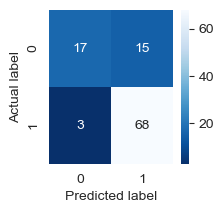

In [175]:
# Graphical representation of confusion matrix

cm = metrics.confusion_matrix(testY,predictions)

plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Model 2 has a slightly better train model accuracy compared to model 1 but there are not many differences in terms of model performance. As my final model, I will choose model 2.